**Name:** Anton Paala <br>
**Course & Section:** CPE313 - CPE32S3 <br>
**Instructor:** Engr. Neal Barton James Matira
<hr>

# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks 
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [2]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

c:\Users\Anton Paala\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


Load the dataset

In [3]:

filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin", 
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [4]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
224,1,100,66,15,56,23.6,0.666,26,0
109,0,95,85,25,36,37.4,0.247,24,1
508,2,84,50,23,76,30.4,0.968,21,0
12,10,139,80,0,0,27.1,1.441,57,0
596,0,67,76,0,0,45.3,0.194,46,0


In [5]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [6]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [8]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes. 
Use the sequential model with single layer network and input shape to 8. 



Normalize the data

In [9]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation 
* Final layer with one node and sigmoid activation (standard for binary classification)

In [10]:


model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

c:\Users\Anton Paala\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


View the model summary 

In [11]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

Train the model 
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history. 


In [12]:
model.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)



Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3646 - loss: 0.7938 - val_accuracy: 0.3542 - val_loss: 0.7849
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3698 - loss: 0.7762 - val_accuracy: 0.3750 - val_loss: 0.7699
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3906 - loss: 0.7604 - val_accuracy: 0.3854 - val_loss: 0.7562
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4149 - loss: 0.7459 - val_accuracy: 0.4115 - val_loss: 0.7436
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4323 - loss: 0.7326 - val_accuracy: 0.4323 - val_loss: 0.7321
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4566 - loss: 0.7205 - val_accuracy: 0.4427 - val_loss: 0.7215
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4757 - loss: 0.7094 - val_accuracy: 0.4740 - val_loss: 0.7118
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4965 - loss: 0.6992 - val_accuracy: 0.5000 - 

In [13]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = (model.predict(X_test_norm) > 0.5).astype(int)
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [14]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]])

In [15]:
y_pred_prob_nn_1[:10]

array([[0.5837462 ],
       [0.60092556],
       [0.3575671 ],
       [0.33198482],
       [0.16610056],
       [0.4470915 ],
       [0.04493661],
       [0.34076038],
       [0.68085   ],
       [0.17017274]], dtype=float32)

Create the plot_roc function

In [16]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.760
roc-auc is 0.803


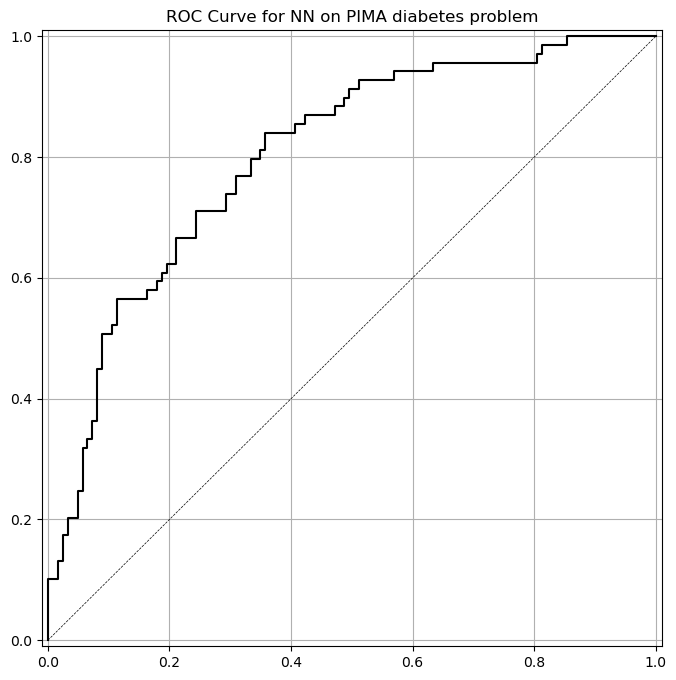

In [17]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')
plt.show()

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [18]:
run_hist_1.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

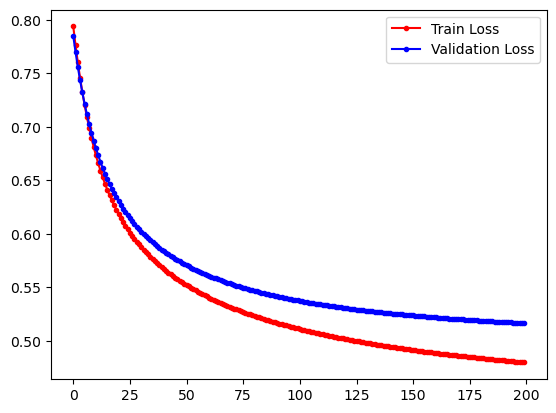

In [19]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()
plt.show()

What is your interpretation about the result of the train and validation loss?

- The results of the train and validation loss show that the model was pretty accurate. It was on the best fit since it didn't overfit. 

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures. 
* Plot the results of training and validation loss using different learning rates, number of epochs and network structures
* Interpret your result

In [20]:
# Build a model with two hidden layers, each with 6 nodes
# Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
model_2 = Sequential([Dense(6, input_shape=(8,),activation="relu"),
                      Dense(6, activation="relu"),
                      Dense(1, activation="sigmoid")])

c:\Users\Anton Paala\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Use a learning rate of .003 and train for 1500 epochs

In [21]:
model_2.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3976 - loss: 0.7990 - val_accuracy: 0.4219 - val_loss: 0.7717
Epoch 2/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4080 - loss: 0.7866 - val_accuracy: 0.4323 - val_loss: 0.7604
Epoch 3/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4167 - loss: 0.7752 - val_accuracy: 0.4531 - val_loss: 0.7502
Epoch 4/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4340 - loss: 0.7649 - val_accuracy: 0.4740 - val_loss: 0.7408
Epoch 5/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4514 - loss: 0.7554 - val_accuracy: 0.4896 - val_loss: 0.7323
Epoch 6/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4583 - loss: 0.7466 - val_accuracy: 0.5000 - val_loss: 0.7245
Epoch 7/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4740 - loss: 0.7386 - val_accuracy: 0.5104 - val_loss: 0.7173
Epoch 8/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4878 - loss: 0.7312 - val_accuracy: 

In [22]:
y_pred_class_nn_2 = (model_2.predict(X_test_norm) > 0.5).astype(int)
y_pred_prob_nn_2 = model_2.predict(X_test_norm)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


Graph the trajectory of the loss functions, accuracy on both train and test set

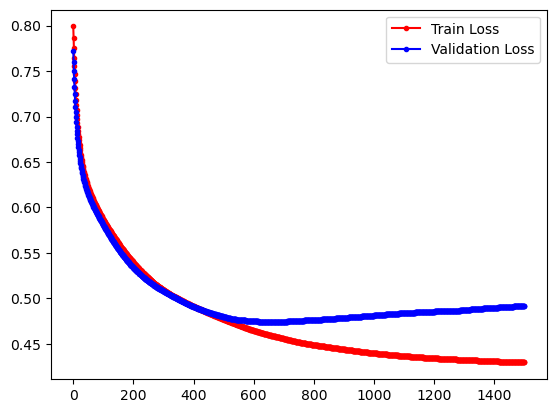

In [23]:
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()
plt.show()

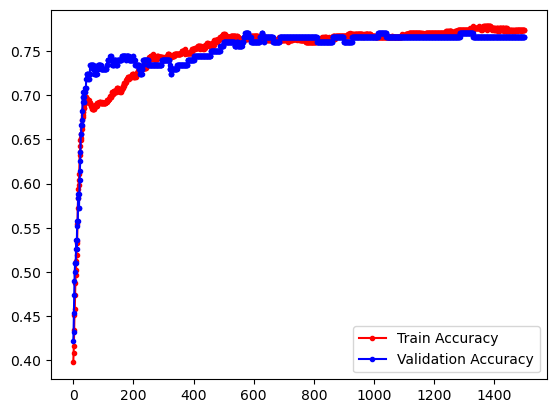

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["accuracy"],'r', marker='.', label="Train Accuracy")
ax.plot(run_hist_2.history["val_accuracy"],'b', marker='.', label="Validation Accuracy")
ax.legend()
plt.show()

Plot the roc curve for the predictions

accuracy is 0.766
roc-auc is 0.826


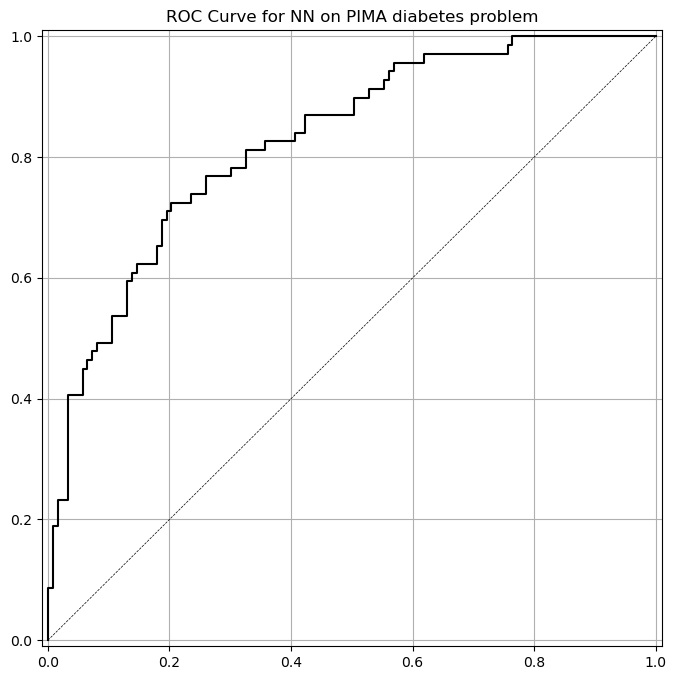

In [25]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

plot_roc(y_test, y_pred_prob_nn_2, 'NN')
plt.show()

* Use different learning rates, numbers of epochs, and network structures. 
* Plot the results of training and validation loss using different learning rates, number of epochs and network structures
* Interpret your result

In [325]:
model_3 = Sequential([Dense(20, input_shape=(8,),activation="relu"),
                      Dense(24, activation="relu"),
                      Dense(20, activation="relu"),
                      Dense(1, activation="sigmoid")])

In [326]:
np.random.seed(42)
model_3.compile(SGD(learning_rate=.0067), "binary_crossentropy", metrics=["accuracy"])
run_hist_3 = model_3.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=150)

Epoch 1/150


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3802 - loss: 0.7316 - val_accuracy: 0.4010 - val_loss: 0.7090
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4497 - loss: 0.7101 - val_accuracy: 0.5000 - val_loss: 0.6925
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5278 - loss: 0.6935 - val_accuracy: 0.6250 - val_loss: 0.6799
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6163 - loss: 0.6805 - val_accuracy: 0.6615 - val_loss: 0.6703
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6701 - loss: 0.6702 - val_accuracy: 0.6667 - val_loss: 0.6627
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6788 - loss: 0.6618 - val_accuracy: 0.7188 - val_loss: 0.6565
Epoch 7/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6927 - loss: 0.6547 - val_accuracy: 0.7188 - val_loss: 0.6512
Epoch 8/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7101 - loss: 0.6486 - val_accuracy: 0.7135 - val_loss: 0

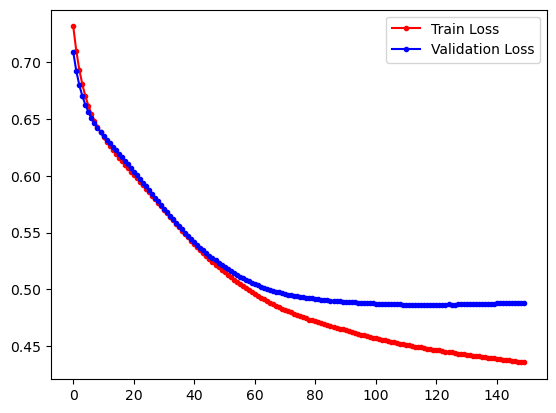

In [327]:
fig, ax = plt.subplots()
ax.plot(run_hist_3.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_3.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()
plt.show()

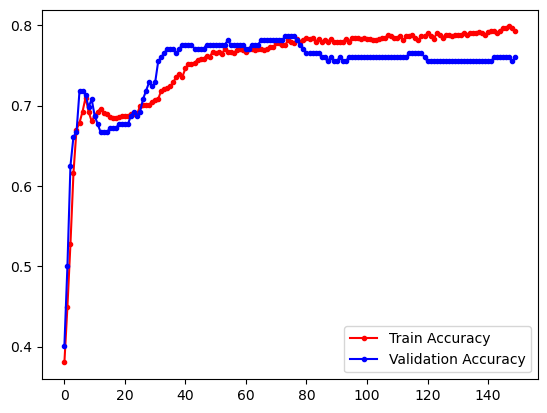

In [328]:
fig, ax = plt.subplots()
ax.plot(run_hist_3.history["accuracy"],'r', marker='.', label="Train Accuracy")
ax.plot(run_hist_3.history["val_accuracy"],'b', marker='.', label="Validation Accuracy")
ax.legend()
plt.show()

##### Based on the graphs of the new model, it shows that the training loss is decreasing while the validation loss is increasing. It suggests that the model is prone to overfitting. One of the probable cause why this happens is that the dataset was not cleaned enough for the model to predict. Hyperparameter optimization is used to determine the best learning rate, number of epochs, and optimizers. Additionally, the epochs were reduced since the model hits a plateau when it reaches 200+ epochs, which has diminishing returns.

#### Conclusion


In conclusion, I was able to successfully demonstrate how to build and train neural networks by the use of the Keras library. I have understood that a neural network consists of an input layer, hidden layer, and output layer. The input layer consists of the inputs from the dataset, while the hidden layers process the information gathered from the input layer, and then shows the results in the output layer. Additionally, I have learned how to evaluate and plot the model using training and validation loss by the use of Matplot Library, where the graphs show the values of training and validation loss per epoch.